Import transformer methods

In [1]:
from transformations import DataTransform
# Setting up Datatransformer
transformer = DataTransform()

Loading in the dataframe

In [2]:
import pandas as pd

df = pd.read_csv("loan_payments.csv")
df.head(10)

,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,...,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,...,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,...,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,...,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,...,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
5,5,38656111,41439917,2525,2525.0,2525.0,36 months,11.44,83.20,B,...,0.0,0.0,Jan-2022,91.39,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
6,6,38656110,41439916,6675,6675.0,6675.0,NaN,21.99,254.89,E,...,0.0,0.0,Mar-2021,6724.95,NaN,Mar-2021,0.0,NaN,1,INDIVIDUAL
7,7,38656067,41439872,26500,26500.0,26200.0,NaN,19.99,701.95,E,...,0.0,0.0,Aug-2021,701.95,NaN,Jan-2022,0.0,43.0,1,INDIVIDUAL
8,8,38656063,41439868,10000,10000.0,10000.0,60 months,12.99,227.48,C,...,0.0,0.0,Jan-2022,227.48,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
9,9,38656052,41439857,10000,NaN,10000.0,36 months,8.19,314.25,A,...,0.0,0.0,Jan-2022,314.25,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


# Converting Date Columns
Columns to convert to the correct format:

term: remove months text
next_payment_date: convert to date
last_payment_date: convert to date
issue_date: convert to date
earliest_credit_line: convert to date
last_credit_pull_date: convert to date

In [3]:
df[["term", "next_payment_date", "last_payment_date", "issue_date", "earliest_credit_line", "last_credit_pull_date"]].head(10)

,term,next_payment_date,last_payment_date,issue_date,earliest_credit_line,last_credit_pull_date
0,36 months,Feb-2022,Jan-2022,Jan-2021,Oct-1987,Jan-2022
1,36 months,Feb-2022,Jan-2022,Jan-2021,Sep-2001,Jan-2022
2,36 months,NaN,Oct-2021,Jan-2021,Sep-1998,Oct-2021
3,36 months,NaN,Jun-2021,Jan-2021,Jun-2008,Jun-2021
4,36 months,Feb-2022,Jan-2022,Jan-2021,Apr-2002,Jan-2022
5,36 months,Feb-2022,Jan-2022,Jan-2021,Mar-2011,Jan-2022
6,NaN,NaN,Mar-2021,Jan-2021,Nov-2006,Mar-2021
7,NaN,NaN,Aug-2021,Jan-2021,Mar-2001,Jan-2022
8,60 months,Feb-2022,Jan-2022,Jan-2021,Nov-2005,Jan-2022
9,36 months,Feb-2022,Jan-2022,Jan-2021,Feb-2002,Jan-2022


Converting the columns

In [4]:
date_column_list = [
    "next_payment_date", 
    "last_payment_date", 
    "issue_date", 
    "earliest_credit_line", 
    "last_credit_pull_date"
]

for date_column in date_column_list:
    transformer.convert_dates(df, date_column=date_column)

transformer.extract_months(df, "term")
df[["term", "next_payment_date", "last_payment_date", "issue_date", "earliest_credit_line", "last_credit_pull_date"]].head(10)

,term,next_payment_date,last_payment_date,issue_date,earliest_credit_line,last_credit_pull_date
0,36.0,2022-02-01,2022-01-01,2021-01-01,1987-10-01,2022-01-01
1,36.0,2022-02-01,2022-01-01,2021-01-01,2001-09-01,2022-01-01
2,36.0,NaT,2021-10-01,2021-01-01,1998-09-01,2021-10-01
3,36.0,NaT,2021-06-01,2021-01-01,2008-06-01,2021-06-01
4,36.0,2022-02-01,2022-01-01,2021-01-01,2002-04-01,2022-01-01
5,36.0,2022-02-01,2022-01-01,2021-01-01,2011-03-01,2022-01-01
6,NaN,NaT,2021-03-01,2021-01-01,2006-11-01,2021-03-01
7,NaN,NaT,2021-08-01,2021-01-01,2001-03-01,2022-01-01
8,60.0,2022-02-01,2022-01-01,2021-01-01,2005-11-01,2022-01-01
9,36.0,2022-02-01,2022-01-01,2021-01-01,2002-02-01,2022-01-01


In [5]:
print(date_column_list[0])

next_payment_date


After conversion

In [6]:
df[["term", "next_payment_date", "last_payment_date", "issue_date", "earliest_credit_line", "last_credit_pull_date"]].head(10)

,term,next_payment_date,last_payment_date,issue_date,earliest_credit_line,last_credit_pull_date
0,36.0,2022-02-01,2022-01-01,2021-01-01,1987-10-01,2022-01-01
1,36.0,2022-02-01,2022-01-01,2021-01-01,2001-09-01,2022-01-01
2,36.0,NaT,2021-10-01,2021-01-01,1998-09-01,2021-10-01
3,36.0,NaT,2021-06-01,2021-01-01,2008-06-01,2021-06-01
4,36.0,2022-02-01,2022-01-01,2021-01-01,2002-04-01,2022-01-01
5,36.0,2022-02-01,2022-01-01,2021-01-01,2011-03-01,2022-01-01
6,NaN,NaT,2021-03-01,2021-01-01,2006-11-01,2021-03-01
7,NaN,NaT,2021-08-01,2021-01-01,2001-03-01,2022-01-01
8,60.0,2022-02-01,2022-01-01,2021-01-01,2005-11-01,2022-01-01
9,36.0,2022-02-01,2022-01-01,2021-01-01,2002-02-01,2022-01-01


# Converting Categorical Columns

Categorical columns to convert are

grade: columns a set of letter - ordinal column
sub_grade: column is grades of letters - ordinal column
home_ownership: nominal column
verification_status: nominal column
loan_status: nominal column
purpose: nominal column
employment_length: ordinal column

In [7]:
df[[
    "grade", 
    "sub_grade", 
    "home_ownership", 
    "verification_status", 
    "loan_status", 
    "purpose", 
    "employment_length", 
    "term",
    "payment_plan"
]].head(10)

,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,employment_length,term,payment_plan
0,A,A4,MORTGAGE,Not Verified,Current,credit_card,5 years,36.0,n
1,A,A3,RENT,Not Verified,Current,credit_card,9 years,36.0,n
2,A,A4,MORTGAGE,Source Verified,Fully Paid,credit_card,8 years,36.0,n
3,C,C4,RENT,Source Verified,Fully Paid,debt_consolidation,1 year,36.0,n
4,A,A1,MORTGAGE,Verified,Current,debt_consolidation,10+ years,36.0,n
5,B,B4,OWN,Source Verified,Current,home_improvement,< 1 year,36.0,n
6,E,E5,RENT,Verified,Fully Paid,debt_consolidation,NaN,NaN,n
7,E,E3,RENT,Source Verified,Charged Off,debt_consolidation,< 1 year,NaN,n
8,C,C2,RENT,Source Verified,Current,credit_card,< 1 year,60.0,n
9,A,A5,MORTGAGE,Not Verified,Current,credit_card,10+ years,36.0,n


Checking to see the unique values

In [8]:
print(df["loan_status"].unique())

['Current' 'Fully Paid' 'Charged Off' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)' 'Default'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


Changing to categorical columns

In [9]:
columns = [
    "grade", 
    "sub_grade", 
    "home_ownership", 
    "verification_status", 
    "loan_status", 
    "purpose", 
    "employment_length", 
    "term", 
    "payment_plan",
    "application_type",
    "policy_code"
]

for column in columns:
    transformer.convert_category_to_numerical(df, column)

df[columns].tail(10)

,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,employment_length,term,payment_plan,application_type,policy_code
54221,2,12,2,3,8,9,6,1,1,1,1
54222,1,1,1,1,2,2,6,1,1,1,1
54223,2,8,2,1,8,2,6,1,1,1,1
54224,3,5,1,1,8,2,11,1,1,1,1
54225,5,13,2,1,8,14,4,0,1,1,1
54226,3,16,1,1,2,7,4,1,1,1,1
54227,2,8,2,1,2,7,6,1,1,1,1
54228,1,19,1,1,8,2,5,1,1,1,1
54229,1,19,2,1,2,11,9,1,1,1,1
54230,2,25,1,1,9,7,2,1,1,1,1


# Dropping Columns with high Null percentages

<Axes: >

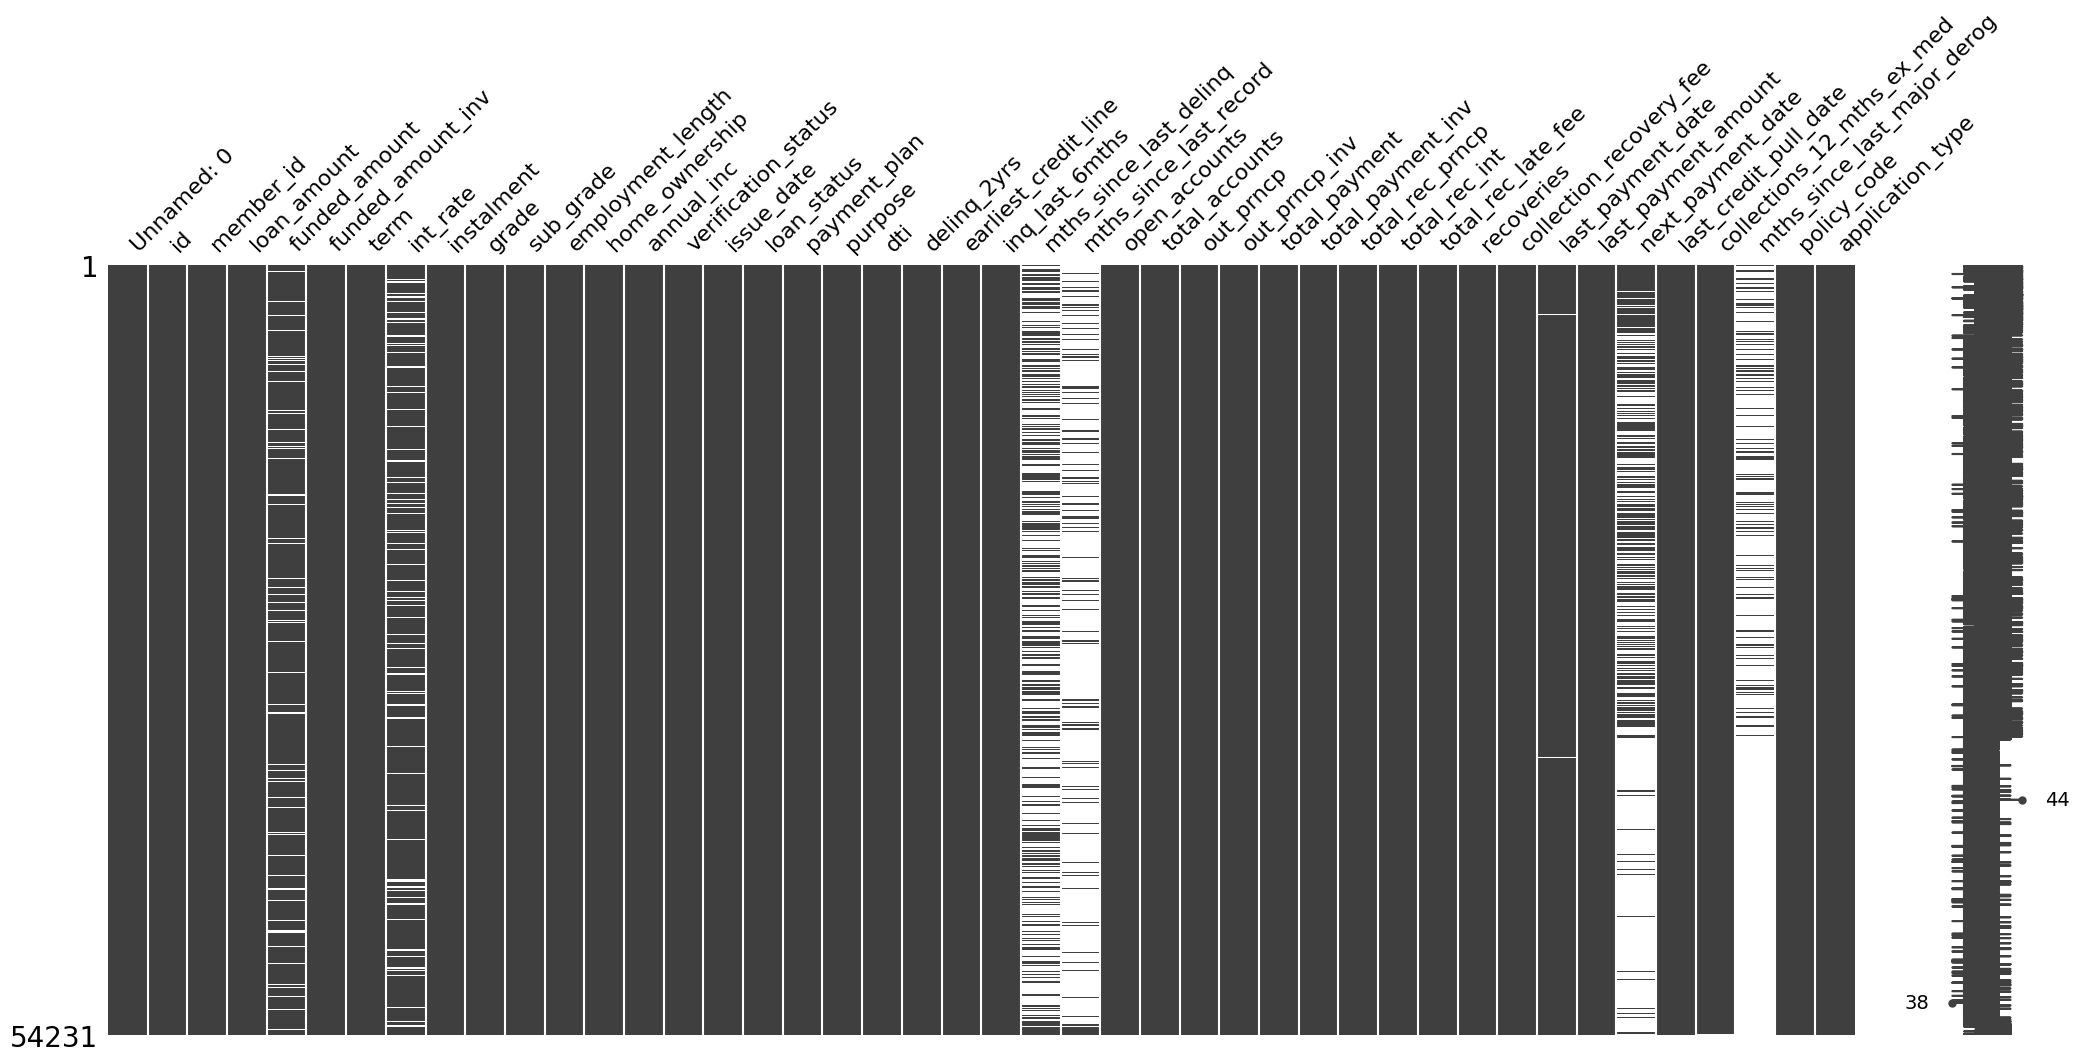

In [10]:
import missingno as msno
msno.matrix(df)

In [11]:
def get_missing_values(df): 
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                    'percent_missing': percent_missing})
    missing_value_df = missing_value_df.loc[missing_value_df["percent_missing"] != 0]
# Only get columns that having missing values
    return missing_value_df
missing_values = get_missing_values(df)
print(missing_values)

                                             column_name  percent_missing
funded_amount                              funded_amount         5.544799
int_rate                                        int_rate         9.531449
mths_since_last_delinq            mths_since_last_delinq        57.166565
mths_since_last_record            mths_since_last_record        88.602460
last_payment_date                      last_payment_date         0.134609
next_payment_date                      next_payment_date        60.127971
last_credit_pull_date              last_credit_pull_date         0.012908
collections_12_mths_ex_med    collections_12_mths_ex_med         0.094042
mths_since_last_major_derog  mths_since_last_major_derog        86.172116


Columns to be dropped:

 - mths_since_last_delinq
 - mths_since_last_record
 - next_payment_date
 - mths_since_last_major_derog

since they're way over a comfortable threshold of missing values

In [12]:
df = df.drop(columns=["mths_since_last_delinq", "mths_since_last_record", "next_payment_date", "mths_since_last_major_derog"])

Would probably in this case remove:
 - collections_12_mths_ex_med
 - last_credit_pull_date
 - last_payment_date
 
 Since it's a minor amount of rows and we have 54k rows. We'll assume we aren't though and impute these columns. Either option is fine in this case.


# Imputing - Finding Skew

Now we need to determine whether we're going to impute these columns with the mean or the median. First we'll need to determine if the columns are skewed or not. If the columns are skewed (abs(skew)>1) then it will be a bad idea to impute with the mean and so we can use the median.

Also note that the loan_amount and funded_amount columns basically have the same value everywhere where there is not a null in funded_amount. So we could either impute the funded_amount column or we could just set it to the value of the loan_amount column. In both cases I would see this as valid we'll got with imputing just now. I would drop the datetime rows here as well since it will be too hard to determine the next payment date. This leaves us with just term and int_rate.

In [13]:
df["funded_amount"] = df["funded_amount"].fillna(df["loan_amount"])
term_mode = df["term"].mode()
print(term_mode)
df["term"].fillna(term_mode, inplace=True) 
df = df.dropna(subset=['last_payment_date', 'last_credit_pull_date',
       'collections_12_mths_ex_med'])

0    1
Name: term, dtype: int64


Showing the changes

In [14]:
missing_values = get_missing_values(df)
print(missing_values.index)
missing_values

Index(['int_rate'], dtype='object')


,column_name,percent_missing
int_rate,int_rate,9.536044


Getting skew of these columns

In [15]:
skew_df = df['int_rate'].skew()
print(skew_df)

0.411540039874641


int_rate column is under the threshold and term column is over. So we can use median for term and mean for threshold

In [16]:
df["int_rate"] = df["int_rate"].fillna(df["int_rate"].mean())
missing_values = get_missing_values(df)
missing_values

,column_name,percent_missing


Time to perform the transformation. We need to perform all calculations and determine which one reduces the skew most. We will then apply that transformation to that particular column. Learners might also just apply one transformation across the whole dataset which I think is fine in this case as well.

NOTE: Leaners can use https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html to reverse transforms in their data.

Find the skewed columns first

In [17]:
skew_df = df.skew(numeric_only=True).to_frame().reset_index()
skew_df = skew_df.loc[abs(skew_df[0]) >= 1] 
skew_df

,index,0
1,id,2.369415
2,member_id,2.204549
13,annual_inc,8.735737
15,loan_status,3.362974
16,payment_plan,232.594067
17,purpose,2.163392
19,delinq_2yrs,5.318818
20,inq_last_6mths,3.243836
21,open_accounts,1.059493
23,out_prncp,2.352526


Ok we can see all the columns where the abs(skew) >= 1 time to transform these. So we'll need to apply all transformations to the columns to determine which transformation reduces the skew the most. Once that's determined we can then apply that transformation directly to the dataframe. I have a the class skew_transform.py which does this for us here.

In [18]:
from skew_transform import SkewTransform

# this class takes an optional manual_mapping parameter which is a dictionary of a columns to transform the associated function
# Example: SkewTransform(df, df.skew(), manual_mapping{"term": "log"})
# Create a copy of the orginal dataframe 
transformed_df = df
skew_transformer = SkewTransform(transformed_df, transformed_df.skew(numeric_only=True))
skew_transformer.transform_data()
transformed_df = skew_transformer.data

Display the change in skew

In [19]:
skew_df = transformed_df.skew(numeric_only=True).to_frame().reset_index()
skew_df = skew_df.loc[abs(skew_df[0]) >= 1]
skew_df

,index,0
19,delinq_2yrs,2.046479
29,total_rec_late_fee,5.517524
30,recoveries,3.821052
31,collection_recovery_fee,5.413147
33,collections_12_mths_ex_med,16.219456


So we can see we've heavily reduced the amount of skew from the columns though some still remain.

Now to remove the outliers from the dataset either with imputation or leaving them in the data. We can use the z-score or IQR method to impute the outliers in the dataset from the impute_outliers.py script. Or the learner might choose to leave the outliers alone as they belong to the dataset. We'll use boxplots to determine if columns might have outliers first.

Split the columns into numerical, categorical and remove any additional columns which are not required.

First remove:

member_id
id
Unnamed: 0
Columns

In [20]:
at_random_columns = ["member_id", "id", 'Unnamed: 0']
print(df.columns)
categorical_columns = [
    "policy_code", 
    "collections_12_mths_ex_med",
    "grade", "sub_grade", 
    "home_ownership", 
    "verification_status", 
    "loan_status", 
    "purpose", 
    "employment_length",
    "term",
    "payment_plan"
]
numerical_columns = set(transformed_df.columns) - set(categorical_columns) - set(at_random_columns)
numerical_columns = list(numerical_columns)
print(list(numerical_columns))

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amount', 'funded_amount',
       'funded_amount_inv', 'term', 'int_rate', 'instalment', 'grade',
       'sub_grade', 'employment_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_date', 'loan_status', 'payment_plan',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line',
       'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp',
       'out_prncp_inv', 'total_payment', 'total_payment_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_payment_date', 'last_payment_amount',
       'last_credit_pull_date', 'collections_12_mths_ex_med', 'policy_code',
       'application_type'],
      dtype='object')
['instalment', 'int_rate', 'open_accounts', 'application_type', 'total_payment_inv', 'dti', 'inq_last_6mths', 'loan_amount', 'out_prncp_inv', 'total_rec_int', 'funded_amount', 'recoveries', 'funded_amount_inv', 'out_prncp', 'd

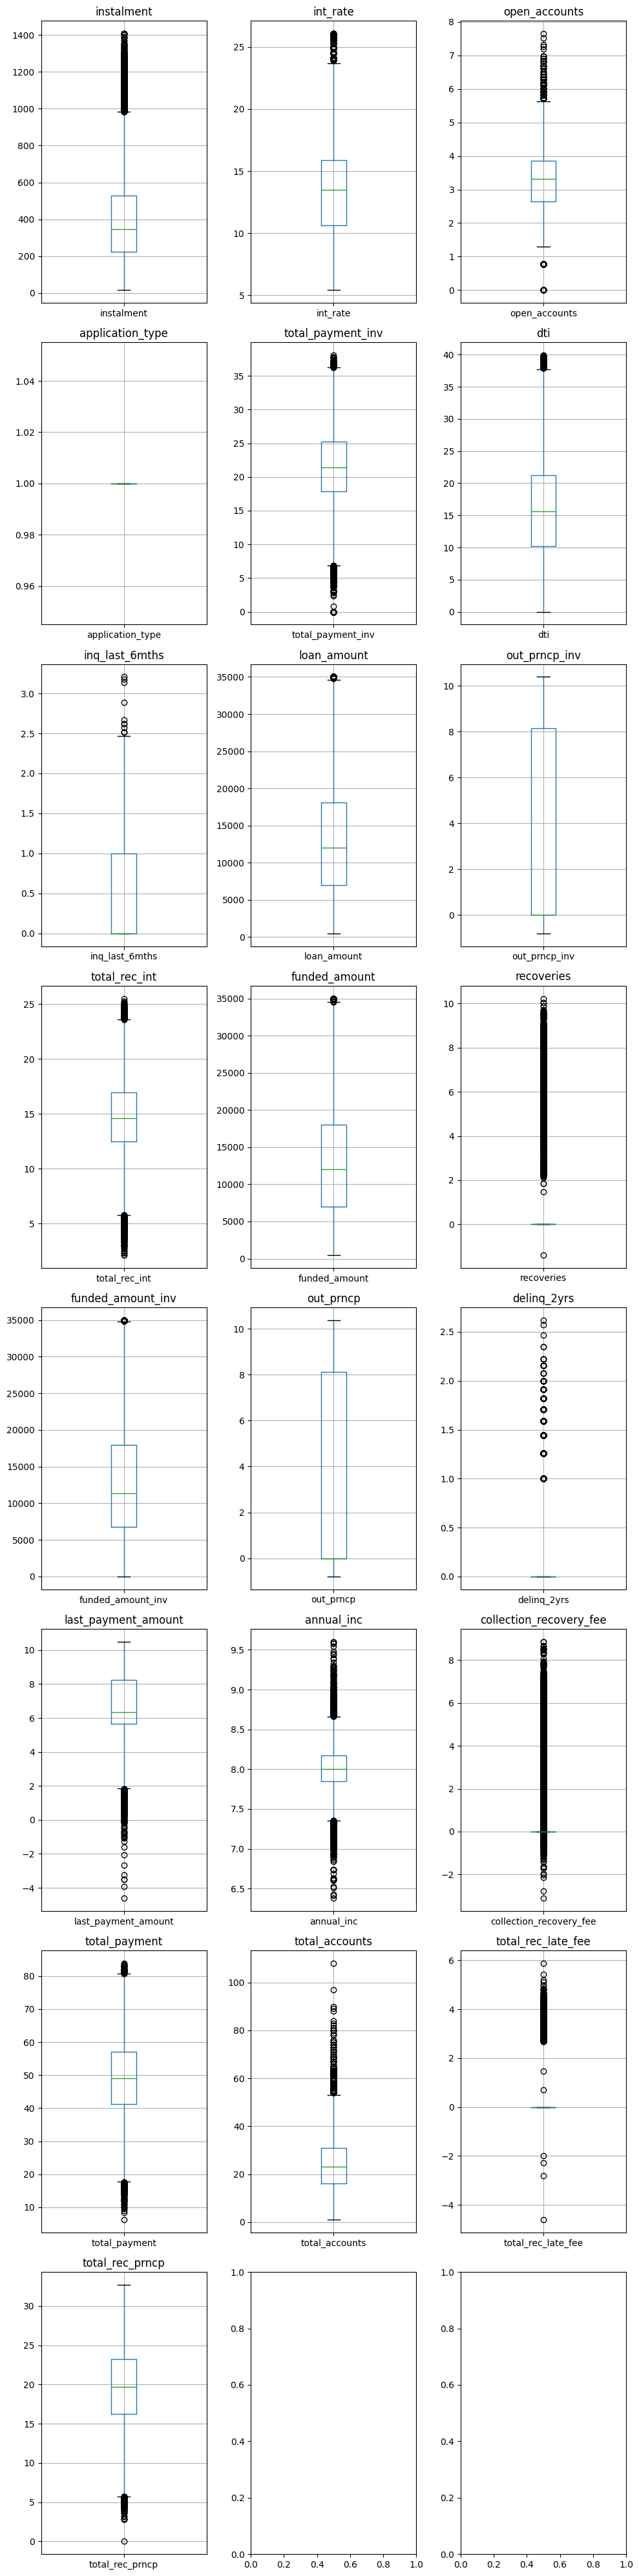

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(10, 40))
axes = axes.flatten()

for idx, column in enumerate(numerical_columns):
    transformed_df.boxplot(column=column, ax=axes[idx])
    axes[idx].set_title(column)

plt.tight_layout()
plt.show()

Seems there's quite a few columns with potential outliers so let's get a list of them to determine if we should drop of we can impute them with the mean or median depending on the skew of the column. In this case we'll use the z-score and IQR method to impute the columns. I could be valid to drop them also or just keep them we can leave this to the learners discretion. Only a few columns here I might alter that look like they have some extreme values. total_accounts and inq_last_6mths have a few values which looks like they might be extreme so we might drop outliers from those columns.

Let's first check the skew to see whether we should drop values using the z-score or the IQR method.

In [22]:
skew_df = transformed_df[["total_accounts", "inq_last_6mths"]].skew(numeric_only=True).to_frame().reset_index()
skew_df

,index,0
0,total_accounts,0.780083
1,inq_last_6mths,0.226194


So both as not skewed columns so we can use the z-score method.

In [23]:
import numpy as np

def replace_by_z_score(dataframe, df_column: str, threshold: int=3):
    """
    Removes outliers with the z-score method of removal
    z-score is better when the data is not heavily skewed

    Args:
        DataFrame (DataFrame): Dataframe to replace on
        df_column (str): column to apply the z-score removal to
        threshold (int, optional): z-score threshold to set. Defaults to 3.

    Returns:
        _type_: _description_
    """
    mean = dataframe[df_column].mean()
    z_scores = np.abs((dataframe[df_column] - dataframe[df_column].mean()) / dataframe[df_column].std())
    outliers_mask = z_scores > threshold
    # outliers = outliers[df_column].unique()
    dataframe.loc[outliers_mask, df_column] = mean
    return dataframe

transformed_df = replace_by_z_score(transformed_df, "total_accounts")
transformed_df = replace_by_z_score(transformed_df, "inq_last_6mths")
skew_df = transformed_df[["total_accounts", "inq_last_6mths"]].skew(numeric_only=True).to_frame().reset_index()
#skew_df = skew_df.loc[abs(skew_df[0]) >= 1]
skew_df

C:\Users\MatZa\AppData\Local\Temp\ipykernel_12620\710181574.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '24.181478743068393' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[outliers_mask, df_column] = mean


,index,0
0,total_accounts,0.560899
1,inq_last_6mths,0.217025


Now to replace recoveries with the IQR method

Now to replot the columns

<Axes: >

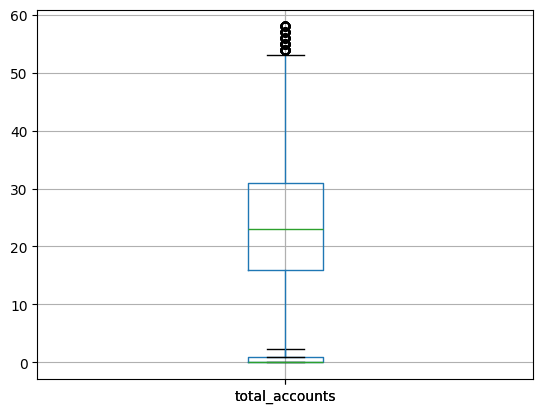

In [24]:
transformed_df.boxplot(column="inq_last_6mths")
transformed_df.boxplot(column="total_accounts")

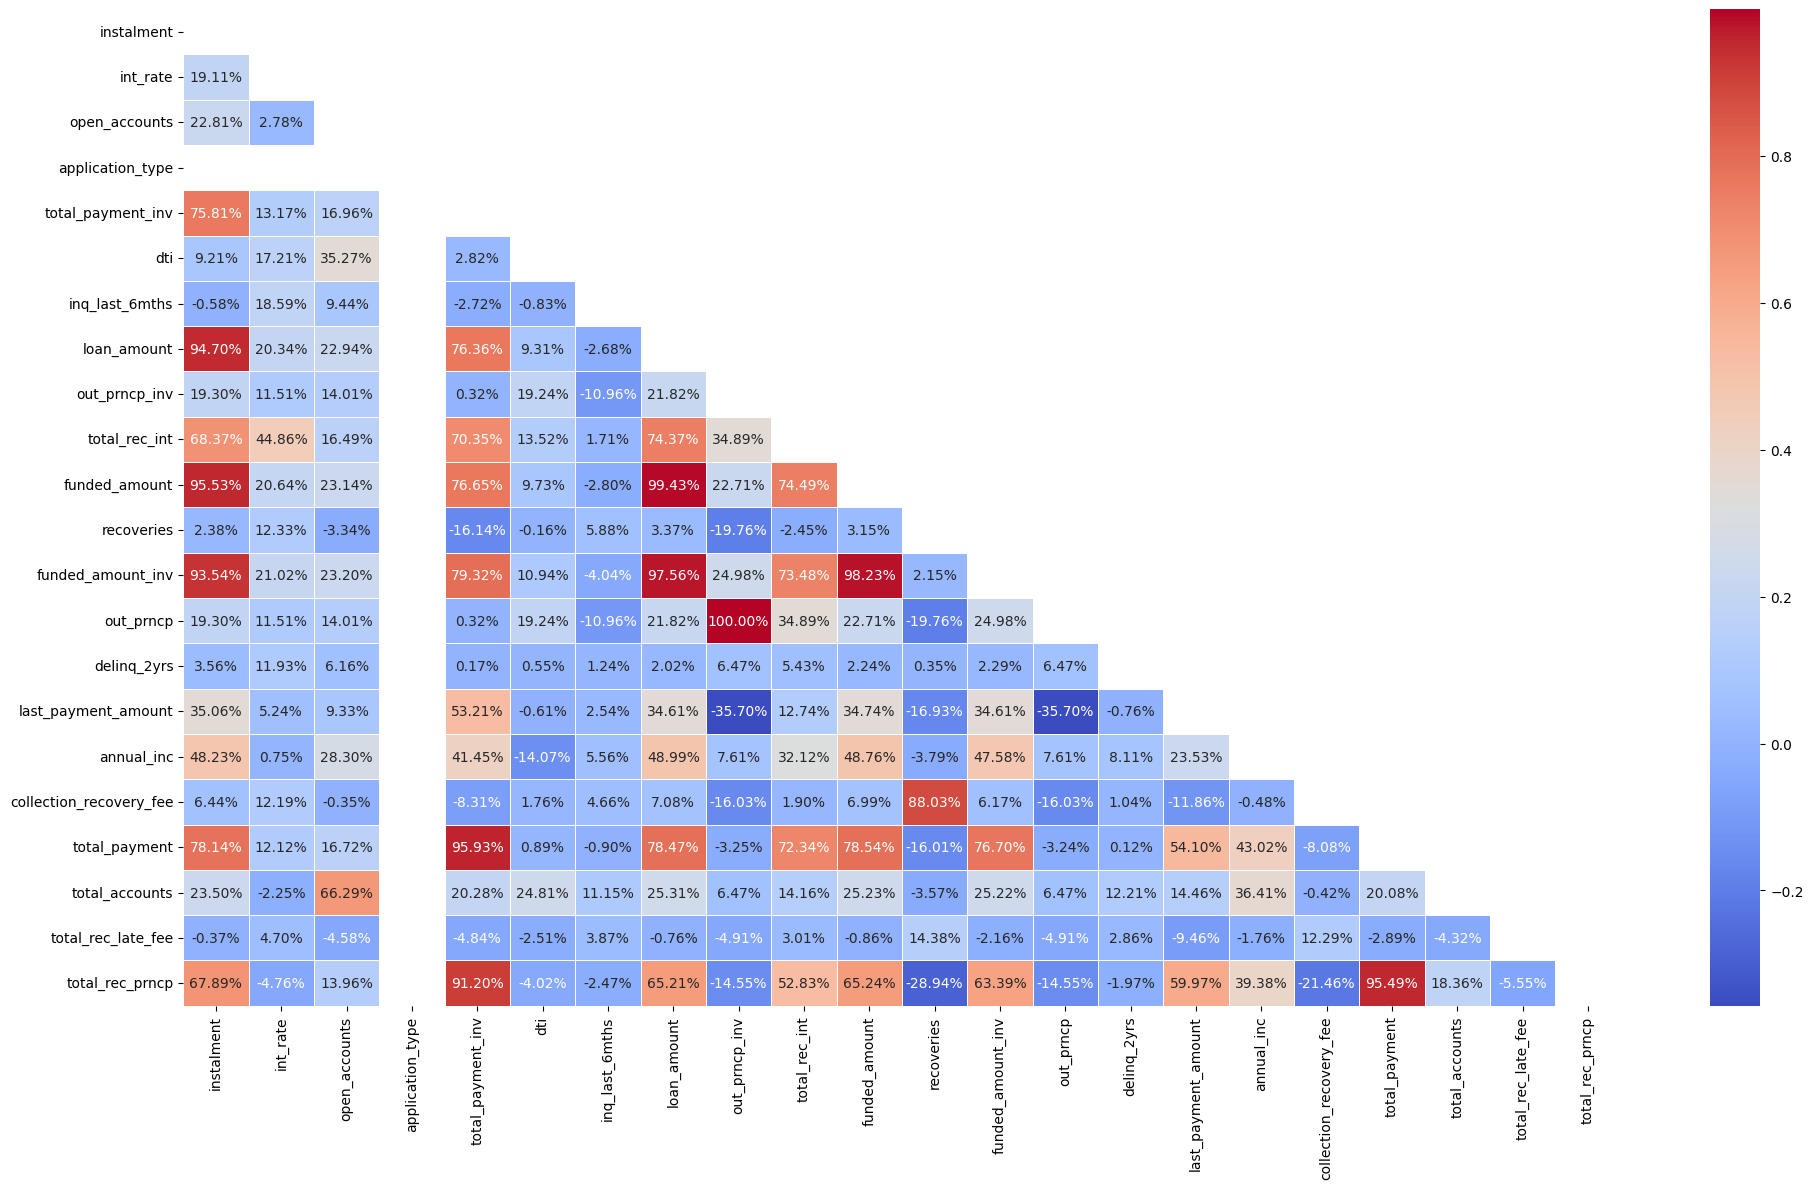

In [25]:
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 12))
only_numeric_df = transformed_df[list(numerical_columns)]
corr_matrix = only_numeric_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix))
corr = sns.heatmap(
    data=corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2%",
    linewidth=.5,
    mask=mask,
    axes=ax
)

plt.tight_layout()
plt.show()

In [26]:
df.to_csv("transformed_loan_payments.csv")
datatypes = df.dtypes 
  
# Print the data types 
# of each column 
datatypes

Unnamed: 0                             int64
id                                     int64
member_id                              int64
loan_amount                            int64
funded_amount                        float64
funded_amount_inv                    float64
term                                   int64
int_rate                             float64
instalment                           float64
grade                                  int64
sub_grade                              int64
employment_length                      int64
home_ownership                         int64
annual_inc                           float64
verification_status                    int64
issue_date                    datetime64[ns]
loan_status                            int64
payment_plan                           int64
purpose                                int64
dti                                  float64
delinq_2yrs                            int64
earliest_credit_line          datetime64[ns]
inq_last_6

# M4T1

Summarise currently what percentage of the loans are recovered against the investor funding and the total amount funded. 
Visualise your results on an appropriate graph.

Additionally visualise what percentage of the total amount would be recovered up to 6 months' in the future.

In [27]:
against_investor_prncp = df["total_rec_prncp"].sum() / df["funded_amount_inv"].sum()
against_total_amount_prncp = df["total_rec_prncp"].sum() / df["funded_amount"].sum()

tot_rec_prncp = df["total_rec_prncp"].sum()
tot_funded_inv = df["funded_amount_inv"].sum()
tot_funded = df["funded_amount"].sum()

print(f'Total recieved prncp: {tot_rec_prncp}')
print(f'Total funded investor: {tot_funded_inv}')
print(f'Total funded: {tot_funded}')

print(f'Percentage recovered against investor funding: {against_investor_prncp} %')
print(f'Percentage recovered against total_amount funding: {against_total_amount_prncp} %')

Total recieved prncp: 509811543.73
Total funded investor: 701645771.7929696
Total funded: 716618800.0
Percentage recovered against investor funding: 0.7265939085291417 %
Percentage recovered against total_amount funding: 0.7114124604741042 %


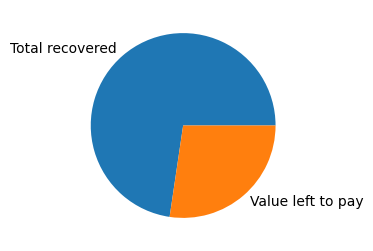

In [28]:
from matplotlib import pyplot as plt
import numpy as np
 
# Creating dataset
labels = ['Total recovered', 'Value left to pay']
 
data = [df["total_rec_prncp"].sum(), df["funded_amount_inv"].sum() - df["total_rec_prncp"].sum()]
 
# Creating plot
fig = plt.figure(figsize =(4, 3))
plt.pie(data, labels = labels)
 
# show plot
plt.show()

In [29]:
pd.set_option('display.max_columns', None) 

Create a few extra columns for anything regarding looking into the future:
- finish_date - term finish date
- term_remaining - remaining term on loan in months 

In [30]:
# convert terms into years
df["term"] = df["term"].map({0: np.timedelta64(5,'Y')   ,1: np.timedelta64(3,'Y')   , 2: np.timedelta64(5,'Y') })

# new column works out the end date of the loan
df["finish_date"] = df["issue_date"] + df["term"]

# new column works out how many months left on the loan
df["term_remaining"] = df["finish_date"].dt.to_period('M').view(dtype='int64') - df["last_payment_date"].dt.to_period('M').view(dtype='int64')
df.head(5)


,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type,finish_date,term_remaining
0,0,38676116,41461848,8000,8000.0,8000.0,1095 days 17:27:36,7.49,248.82,1,1,1,1,46000.0,1,2021-01-01,1,1,1,19.54,2,1987-10-01,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-01-01,0.0,1,1,2024-01-01 17:27:36,24
1,1,38656203,41440010,13200,13200.0,13200.0,1095 days 17:27:36,6.99,407.52,1,2,2,2,50000.0,1,2021-01-01,1,1,1,24.20,0,2001-09-01,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-01-01,0.0,1,1,2024-01-01 17:27:36,24
2,2,38656154,41439961,16000,16000.0,16000.0,1095 days 17:27:36,7.49,497.63,1,1,3,1,73913.0,2,2021-01-01,2,1,1,16.92,0,1998-09-01,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,2021-10-01,12850.16,2021-10-01,0.0,1,1,2024-01-01 17:27:36,27
3,3,38656128,41439934,15000,15000.0,15000.0,1095 days 17:27:36,14.31,514.93,2,3,4,2,42000.0,2,2021-01-01,2,1,2,35.52,0,2008-06-01,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,2021-06-01,13899.67,2021-06-01,0.0,1,1,2024-01-01 17:27:36,31
4,4,38656121,41439927,15000,15000.0,15000.0,1095 days 17:27:36,6.03,456.54,1,4,5,1,145000.0,3,2021-01-01,1,1,2,3.33,0,2002-04-01,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-01-01,0.0,1,1,2024-01-01 17:27:36,24


Work out the next 6 months to be recieved, 1 table with terms under 6 months and the other table with terms at 6 or above

In [31]:
# Table with values of term less than 6 months
index_names = df[~((df["term_remaining"] == 5) | \
                  (df["term_remaining"] == 4) | \
                  (df["term_remaining"] == 3) | \
                  (df["term_remaining"] == 2) | \
                  (df["term_remaining"] == 1))].index 

df_six_month = df.copy()

# drop the other rows
df_six_month.drop(index_names, inplace = True)

# list of indexes of rows to drop if marked as charged off
index_names = df_six_month[((df_six_month['loan_status'] == 9) | (df_six_month['loan_status'] == 3))].index 

# drop the other rows
df_six_month.drop(index_names, inplace = True)

# new col with total for next six months payments
df_six_month["future_six_months"] = df_six_month["term_remaining"] * df_six_month["instalment"]

In [32]:
# Table with values of term 6 or more months
index_names_one = df[((df["term_remaining"] == 5) | \
                  (df["term_remaining"] == 4) | \
                  (df["term_remaining"] == 3) | \
                  (df["term_remaining"] == 2) | \
                  (df["term_remaining"] == 1))].index

df_six_month_one = df.copy()

# drop the other rows
df_six_month_one.drop(index_names_one, inplace = True)

# list of indexes of rows to drop if marked as charged off
index_names = df_six_month_one[((df_six_month_one['loan_status'] == 9) | (df_six_month_one['loan_status'] == 3))].index 

# drop the other rows
df_six_month_one.drop(index_names, inplace = True)

# new col with total for next six months payments
df_six_month_one["future_six_months"] = df_six_month_one["instalment"] * 6

print(df_six_month_one["future_six_months"].sum())

112510169.63999999


In [33]:
# total value of next six months
six_month_sum = df_six_month["future_six_months"].sum() + df_six_month_one["future_six_months"].sum()

# commas
x = ('{:,}'.format(six_month_sum)) 

# print
print(f'Amount to be paid for the next six months: ${x}')

# tot sum of loans given out
tot_sum = df["loan_amount"].sum()

# next 6 month as percentage of all loans given
perc = (six_month_sum / tot_sum) * 100

print(f'Percent of the next six months out of total loans given: {perc}%')

Amount to be paid for the next six months: $114,258,340.29999998
Percent of the next six months out of total loans given: 15.826335551721188%


# M4T2
Calculate the percentage of charged off loans historically and the total amount that was paid towards these loans before being charged off.

In [34]:
#Works our using "charged off" and "credit revoked yada yada: charged off"

num_credit_and_charged_off_col = (df["loan_status"] == 3).sum() + (df["loan_status"] == 9).sum() 
how_many_loans = len(df["id"].unique())

print(f'Number of charged off customers: {num_credit_and_charged_off_col}')

per_cred_and_charged_off = num_credit_and_charged_off_col / how_many_loans * 100

print(f'Percentage of customers charged off: {per_cred_and_charged_off}%')


Number of charged off customers: 5853
Percentage of customers charged off: 10.818853974121996%


In [35]:
# df with these 3 cols
df_charged_off = df[['loan_amount', 'instalment', 'loan_status', 'total_rec_prncp', 'term_remaining']].copy()

# list of indexes of rows to drop unless marked as charged off
index_names = df_charged_off[~((df_charged_off['loan_status'] == 9) | (df_charged_off['loan_status'] == 3))].index 

# drop the other rows
df_charged_off.drop(index_names, inplace = True)

# sum of total paid minus the interest
value_paid_before_charged_off = df_charged_off["total_rec_prncp"].sum()

# commas
x = ('{:,}'.format(value_paid_before_charged_off)) 

print(f'Value paid of charged off loans before they were charged off: ${x}')

Value paid of charged off loans before they were charged off: $21,031,732.53


# M4T3

Calculate the projected loss of the loans marked as Charged Off.

Calculate the loss in revenue these loans would have generated for the company if they had finished their term. Visualise the loss projected over the remaining term of these loans.

In [36]:
from dateutil.relativedelta import relativedelta 

In [37]:
# new column works out revenue lost from remaining term
df_charged_off["revenue_lost"] = (df_charged_off["term_remaining"] * df_charged_off["instalment"])

# sum of all revenue
tot_charged_off_revenue_lost = df_charged_off["revenue_lost"].sum()

# commas 
x = ('{:,}'.format(tot_charged_off_revenue_lost)) 

#print that boi
print(f'Potential revenue from remaining term on charged off loans: ${x}')

Potential revenue from remaining term on charged off loans: $73,682,111.27000001


In [38]:
# total potential loss out of total sum
perc = tot_charged_off_revenue_lost / tot_sum * 100

# commas 
x = ('{:,}'.format(perc)) 

print(f'Percentage of total revenue lost from charged off loans: {x}%')

Percentage of total revenue lost from charged off loans: 10.205975459266126%


In [39]:
df.dtypes

Unnamed: 0                              int64
id                                      int64
member_id                               int64
loan_amount                             int64
funded_amount                         float64
funded_amount_inv                     float64
term                          timedelta64[ns]
int_rate                              float64
instalment                            float64
grade                                   int64
sub_grade                               int64
employment_length                       int64
home_ownership                          int64
annual_inc                            float64
verification_status                     int64
issue_date                     datetime64[ns]
loan_status                             int64
payment_plan                            int64
purpose                                 int64
dti                                   float64
delinq_2yrs                             int64
earliest_credit_line           dat

# M4T4
There are customers who are currently behind with their loan payments. 
This subset of customers represent a risk to company revenue.

What percentage do users' in this bracket currently represent as a percentage of all loans? 
Calculate the total amount of customers in this bracket and how much loss the company would incur their status was changed to Charged Off. 
What is the projected loss of these loans if the customer were to finish the full loans term?

If customers late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?

In [40]:
# customers late on payments
customers_late_on_payments = (df["loan_status"] == 4).sum() + (df["loan_status"] == 6).sum()

# percentage of customers late on payments out of all customers
percentage_of_late = (customers_late_on_payments / len(df)*100)

# loan_status == charged_off, 
print(f'Total customers late on payments: {customers_late_on_payments}')
print(f'Customers behind on payments as a percentage of all customers: {percentage_of_late}%')

Total customers late on payments: 686
Customers behind on payments as a percentage of all customers: 1.268022181146026%


In [41]:
# df for people late on loans
df_late = df[['instalment', 'loan_status', 'term_remaining']].copy()

# index of people behind on loans
index_names = df_late[~((df["loan_status"] == 4) | (df["loan_status"] == 6))].index 

# drop the other rows
df_late.drop(index_names, inplace = True)

# new col for outstanding amount
df_late['remaining_sum'] = df_late['term_remaining'] * df_late['instalment']

# total outstanding to pay
tot_late_revenue_lost = df_late['remaining_sum'].sum()

# commas
x = ('{:,}'.format(tot_late_revenue_lost)) 

print(f'Total outstanding amount of all customers behind on their loans: ${x}')

Total outstanding amount of all customers behind on their loans: $7,616,747.909999999


In [42]:
late_and_charged_off_rev_lost = tot_late_revenue_lost + tot_charged_off_revenue_lost

# commas
x = ('{:,}'.format(late_and_charged_off_rev_lost)) 

print(f'Total of charged off reveneue lost if late payments where also switched to charged off: ${x}')

Total of charged off reveneue lost if late payments where also switched to charged off: $81,298,859.18


# M4T5

In this task you will be analysing the data to visualise the possible indicators that a customer will not be able to pay the loan.

You will want to compare columns which might be indicators against customers who have already stopped paying and customers who are currently behind on payments.

Here are some example columns that might indicate that a user might not pay the loan:

Does the grade of the loan have effect on customers not paying?
Is the purpose for the loan likely to have an effect?
Does the home_ownership value contribute to the likelihood a customer won't pay?
To help identify which columns will be of interest, create a subset of these users.

Make the analysis and determine the columns are contributing to loans not being paid off and visualise any interesting indicators.

Compare these indicators between loans already charged off and loans which could change to charged off to check if these same factors apply to loans which have the potential to change to "Charged Off".

In [43]:
# make a copy of the dataframe 
df_charged_off = df.copy()

# index of rows which have not been charged off
index_names = df_charged_off[~((df_charged_off['loan_status'] == 9) | (df_charged_off['loan_status'] == 3))].index 

# drop the other rows
df_charged_off.drop(index_names, inplace = True)


ValueError: Mask must have the same shape as data.

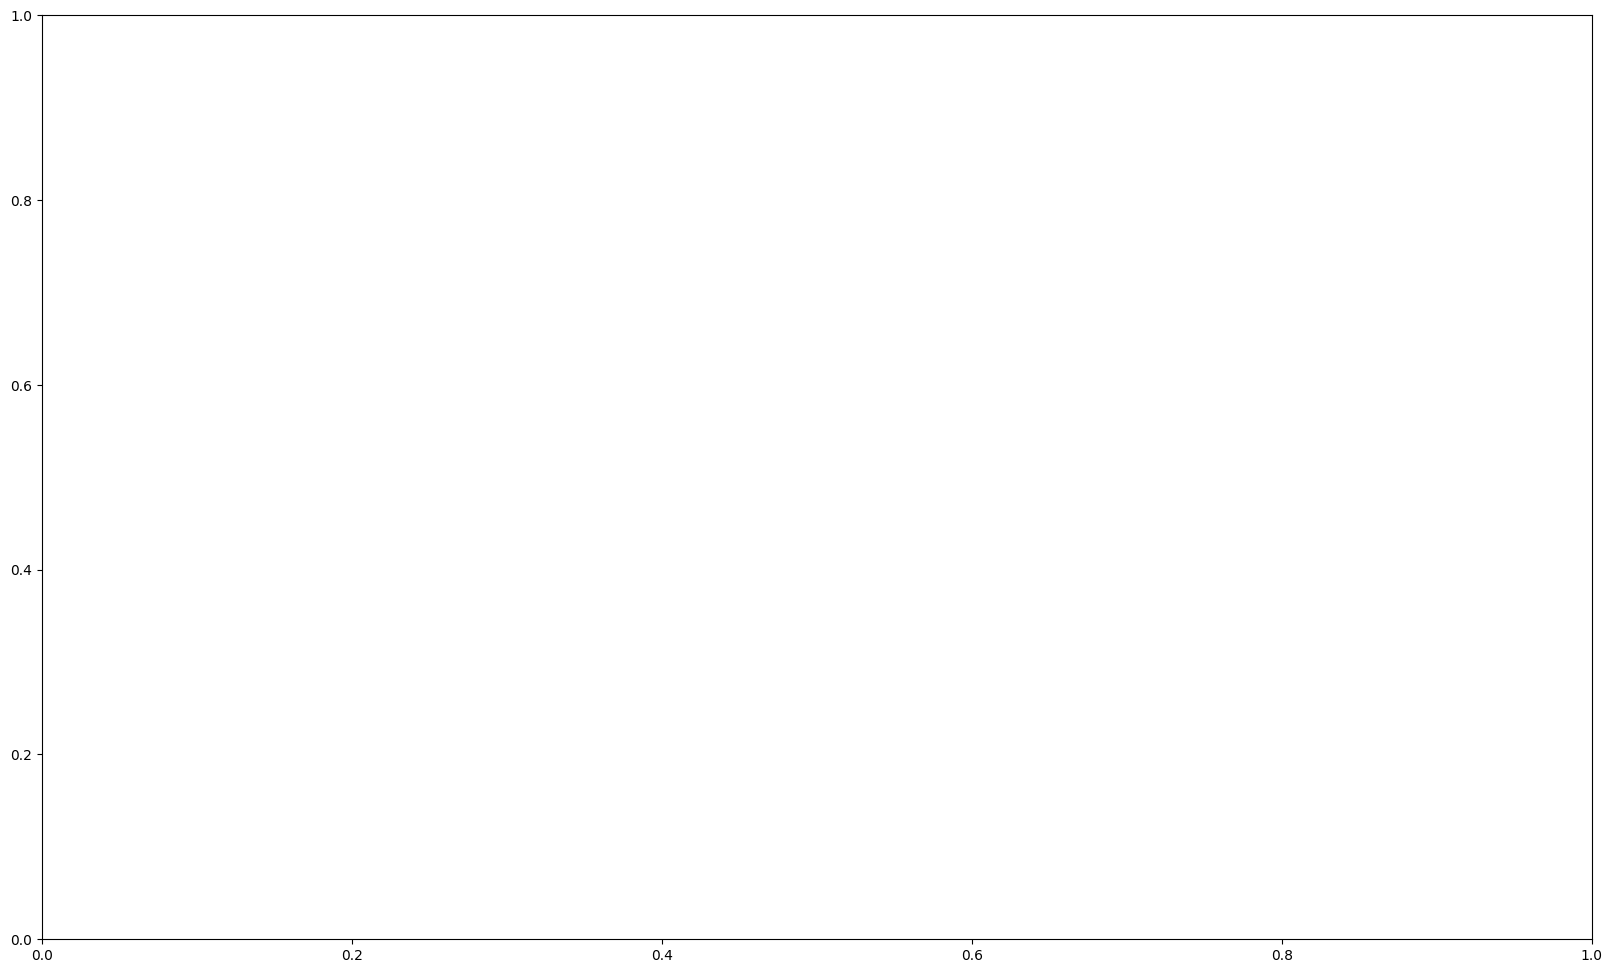

In [44]:
f, ax = plt.subplots(figsize=(20, 12))

df_charged_off_corr = df_charged_off[["int_rate", "grade", "sub_grade", "employment_length", "home_ownership", "annual_inc", "loan_status", "purpose"]].copy()

corr = df_charged_off_corr.corr()
#corr_matrix = corr[corr>=.3]
mask = np.triu(np.ones_like(corr_matrix))
corr = sns.heatmap(
    data=corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2%",
    linewidth=.5,
    mask=mask,
    axes=ax
)

plt.tight_layout()
plt.show()


In [ ]:
figure = corr.get_figure()    
figure.savefig('svm_conf.png', dpi=400)

Home ownership and annual_inc have a weak negative corrolation

Grade and int_rate have quite a strong positive corrolation

Subgrade and int_rate have a weak positive corrolation

In [ ]:
f, ax = plt.subplots(figsize=(20, 12))

df_corr = df[["int_rate", "grade", "sub_grade", "employment_length", "home_ownership", "annual_inc", "loan_status", "purpose"]].copy()

corr = df_corr.corr()
#corr_matrix = corr[corr>=.3]
mask = np.triu(np.ones_like(corr_matrix))
corr = sns.heatmap(
    data=corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2%",
    linewidth=.5,
    mask=mask,
    axes=ax
)

plt.tight_layout()
plt.show()

